# Why pytorch ?

Pytorch looks a lot like numpy. And it has a lot of advantages. Let's see:

## Linear regression with pytorch

In [1]:
import torch
import matplotlib.pyplot as plt

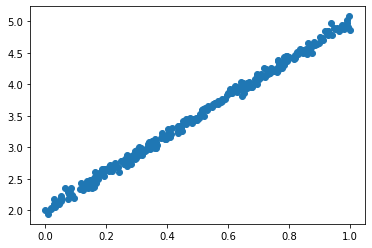

In [2]:
# see how close torch is to numpy ?
x = torch.rand(300)
y = 3 * x + 2 + (torch.randn(300) * 0.05)
plt.scatter(x, y)
plt.show()

In [3]:
# pytorch has a concept of "Parameter", you'll see how powerful it is in a moment
# fill in the blank
a = torch.nn.Parameter(torch.tensor(1.))
b = torch.nn.Parameter(torch.tensor(1.))
print(a, b)

Parameter containing:
tensor(1., requires_grad=True) Parameter containing:
tensor(1., requires_grad=True)


In [4]:
# whenever you calculate something using parameters (i.e, tensors with gradients),
# you can do something.backward()
print(a.grad)
c = a * b
c.backward()
print(a.grad)
a.grad.zero_()
print(a.grad)

None
tensor(1.)
tensor(0.)


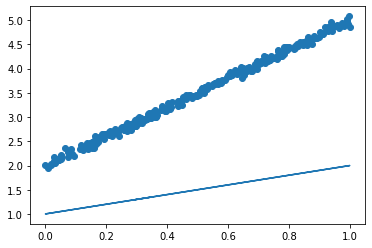

In [5]:
# You'll get an error message. It should be easy to debug ;-)
y_pred = (a * x + b).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred)

In [6]:
# Re-initialize your parameters (just to avoid running the cell above each time your repeat the experiment)
a = torch.nn.Parameter(torch.tensor(-10.))
b = torch.nn.Parameter(torch.tensor(500.))
lr = 0.01 # choose a learning rate
n_epochs = 10000 # pick a number of epochs

for epoch in range(n_epochs):
    # calculate the preds
    y_pred = a * x + b

    # calculate the loss
    mse = torch.mean((y_pred - y) ** 2)
    if epoch % 1000 == 0:
        print(mse)
    # backward pass:
    mse.backward()  # use what you've learned above

    # gradient descent:
    with torch.no_grad():
        a -= a.grad * lr  # use what you've learned above
        b -= b.grad * lr
        # here, if you don't put your gradients to zero, they will accumulate:
        a.grad.zero_()
        b.grad.zero_()

tensor(241756.5312, grad_fn=<MeanBackward0>)
tensor(299.9640, grad_fn=<MeanBackward0>)
tensor(24.9574, grad_fn=<MeanBackward0>)
tensor(2.0787, grad_fn=<MeanBackward0>)
tensor(0.1754, grad_fn=<MeanBackward0>)
tensor(0.0170, grad_fn=<MeanBackward0>)
tensor(0.0039, grad_fn=<MeanBackward0>)
tensor(0.0028, grad_fn=<MeanBackward0>)
tensor(0.0027, grad_fn=<MeanBackward0>)
tensor(0.0027, grad_fn=<MeanBackward0>)


In [7]:
a, a.grad

(Parameter containing:
 tensor(3.0016, requires_grad=True), tensor(0.))

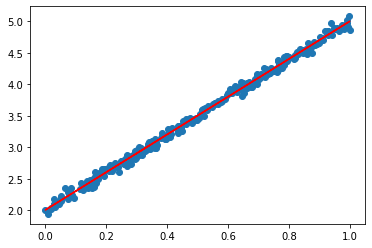

In [8]:
y_pred = (a * x + b).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

In [9]:
print(a, b)

Parameter containing:
tensor(3.0016, requires_grad=True) Parameter containing:
tensor(1.9988, requires_grad=True)


### Learn more
You'll find another approach that uses more advanced pytorch functionalities <a href="https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb"> here</a>, but it requires having the fastai library installed


In [10]:
# An interesting thing they do differently
# is they store a and b in a single vector
# And then perform matrix-vector multiplication

In [11]:
x = torch.ones(200, 2)
a = torch.nn.Parameter(torch.tensor([1., 1.]))

In [12]:
a @ x

RuntimeError: ignored

In [13]:
x @ a

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.], grad_fn=<MvBackward>)

To get a visual understanding of matrix-vector (or matrix-matrix) multiplications, <a href="http://matrixmultiplication.xyz/"> visit this link </a>

You can find a pytorch tutorial that dives deeply into the autograd and computation graph here <a href="https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e"> here </a>